> # Prediction of store sales

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('..')

>> ## Load data

In [2]:
trainData = pd.read_csv("./data/trainData.csv", index_col=0)
testData = pd.read_csv("./data/testData.csv", index_col=0)

/tmp/ipykernel_36441/2286962004.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trainData = pd.read_csv("./data/trainData.csv", index_col=0)
/tmp/ipykernel_36441/2286962004.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  testData = pd.read_csv("./data/testData.csv", index_col=0)


>> ## read data

In [3]:
trainData.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263.0,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,NaN,2015,7,31,31
1,2,5,2015-07-31,6064.0,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314.0,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995.0,1485,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,NaN,2015,7,31,31
4,5,5,2015-07-31,4822.0,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,NaN,2015,7,31,31


>> ## see information

In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionOpenSi

>> ## check missing data

In [5]:
from scripts.dataCleaning import check_missing_data

In [6]:
check_missing_data(trainData)

PromoInterval    508031
dtype: int64

In [7]:
testData.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,4.0,2013.0,0,0.0,0.0,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,10.0,2014.0,0,0.0,0.0,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,8.0,2000.0,0,0.0,0.0,NaN,2015,9,17,38


In [8]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41077 entries, 0 to 41076
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41077 non-null  int64  
 1   Store                      41077 non-null  int64  
 2   DayOfWeek                  41077 non-null  int64  
 3   Date                       41077 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41077 non-null  int64  
 6   StateHoliday               41077 non-null  object 
 7   SchoolHoliday              41077 non-null  int64  
 8   StoreType                  41077 non-null  object 
 9   Assortment                 41077 non-null  object 
 10  CompetitionDistance        41077 non-null  float64
 11  CompetitionOpenSinceMonth  41077 non-null  float64
 12  CompetitionOpenSinceYear   41077 non-null  float64
 13  Promo2                     41077 non-null  int64  


In [9]:
check_missing_data(testData)

PromoInterval    17221
dtype: int64

In [10]:
testData.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,0.0,0.0,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,4.0,2013.0,0,0.0,0.0,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,10.0,2014.0,0,0.0,0.0,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,8.0,2000.0,0,0.0,0.0,NaN,2015,9,17,38


>> ## preprocessing

In [11]:
from scripts.preprocessing import preprocessing

In [12]:
trainData , testData = preprocessing(trainData, testData)

In [13]:
check_missing_data(trainData)

Series([], dtype: int64)

In [14]:
check_missing_data(testData)

Series([], dtype: int64)

In [15]:
trainData.head()

,Store,DayOfWeek,Sales,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,...,StateHoliday_0,StateHoliday_a,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,5,5263.0,1,1,1,1270.0,0,0.0,0.0,...,False,False,False,True,False,False,False,False,False,True
1,2,5,6064.0,1,1,1,570.0,1,13.0,2010.0,...,False,False,False,False,False,False,False,True,False,False
2,3,5,8314.0,1,1,1,14130.0,1,14.0,2011.0,...,False,False,False,False,False,False,False,True,False,False
3,4,5,13995.0,1,1,1,620.0,0,0.0,0.0,...,False,False,False,True,False,False,True,False,False,True
4,5,5,4822.0,1,1,1,16107.5,0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [16]:
testData.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,...,StateHoliday_0,StateHoliday_a,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,4,1.0,1,0,1270.0,0,0.0,0.0,2015,...,True,False,False,True,False,False,False,False,False,True
1,3,4,1.0,1,0,14130.0,1,14.0,2011.0,2015,...,True,False,False,False,False,False,False,True,False,False
2,7,4,1.0,1,0,16107.5,0,0.0,0.0,2015,...,True,False,False,False,False,False,True,False,False,True
3,8,4,1.0,1,0,7520.0,0,0.0,0.0,2015,...,True,False,False,False,False,False,False,False,False,True
4,9,4,1.0,1,0,2030.0,0,0.0,0.0,2015,...,True,False,False,False,False,False,True,False,False,True


In [17]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41077 entries, 0 to 41076
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Store                           41077 non-null  int64  
 1   DayOfWeek                       41077 non-null  int64  
 2   Open                            41077 non-null  float64
 3   Promo                           41077 non-null  int64  
 4   SchoolHoliday                   41077 non-null  int64  
 5   CompetitionDistance             41077 non-null  float64
 6   Promo2                          41077 non-null  int64  
 7   Promo2SinceWeek                 41077 non-null  float64
 8   Promo2SinceYear                 41077 non-null  float64
 9   Year                            41077 non-null  int64  
 10  Month                           41077 non-null  int64  
 11  Day                             41077 non-null  int64  
 12  WeekOfYear                      41077

In [18]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  float64
 3   Open                            1017209 non-null  int64  
 4   Promo                           1017209 non-null  int64  
 5   SchoolHoliday                   1017209 non-null  int64  
 6   CompetitionDistance             1017209 non-null  float64
 7   Promo2                          1017209 non-null  int64  
 8   Promo2SinceWeek                 1017209 non-null  float64
 9   Promo2SinceYear                 1017209 non-null  float64
 10  Year                            1017209 non-null  int64  
 11  Month                           1017209 non-null  int64  
 12  Day  

In [19]:
from scripts.scaleNumericColumn import scale_columns

>> ## scale numeric column

In [20]:
numeric_columns = ['CompetitionDistance', 'Promo2ActiveMonths', 'CompetitionOpenSince','Promo2SinceWeek', 'Promo2SinceYear']

trainData , testData = scale_columns(trainData, testData, numeric_columns)

>> ## Building models with sklearn pipelines

In [21]:
from scripts.trainSplitAndBuildModelWithPip import train_split
from scripts.trainSplitAndBuildModelWithPip import build_pipeline
from scripts.trainSplitAndBuildModelWithPip import model_evaluation
from scripts.trainSplitAndBuildModelWithPip import post_prediction_analysis

In [22]:
# trainData.to_csv("trainDataFile.csv")

>> ## Split train data

In [23]:
X_train, X_val, y_train, y_val = train_split(trainData)

>> ## build model on colab

In [24]:
pipline = build_pipeline(X_train, y_train)

>> ## Choose a loss function = RSME

In [25]:
model_evaluation(pipline,X_val, y_val)

RMSE: 2303.031885221423


>> ##  Post Prediction Analysis

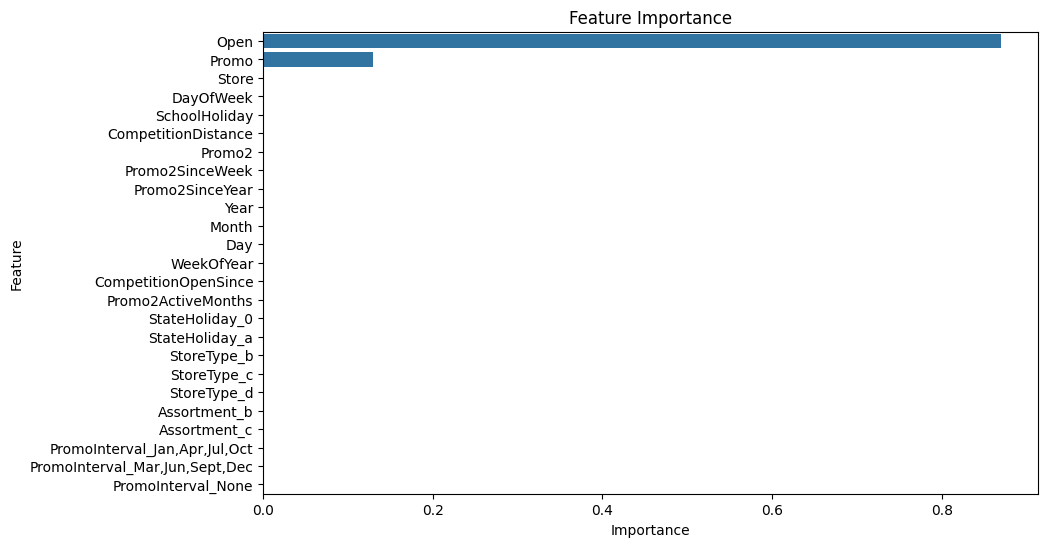

In [26]:
post_prediction_analysis(pipline,X_train)

>> ## Serialize models

In [27]:
from scripts.serializeModel import serialize_model

In [28]:
model_filename = serialize_model(pipline)

>> ## Building model with deep learning 

In [29]:
from scripts.buildModelWithDeepLearning import create_lstm_data
from scripts.buildModelWithDeepLearning import build_lstm_model
from scripts.buildModelWithDeepLearning import train_lstm_model
from scripts.buildModelWithDeepLearning import save_lstm_model

2025-01-14 15:41:13.801309: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 15:41:14.067507: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-14 15:41:14.365410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736858474.627251   36441 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736858474.704878   36441 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 15:41:15.333096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [30]:
from sklearn.preprocessing import MinMaxScaler


scaled_train_data = trainData.values  # Assuming trainData is already scaled
look_back = 3
scaler = MinMaxScaler()  # Or use StandardScaler() if preferred
scaled_train_data = scaler.fit_transform(trainData.drop('Sales', axis=1).values)

In [31]:

X_lstm, y_lstm = create_lstm_data(scaled_train_data, target_col=trainData.columns.get_loc('Sales'), look_back=look_back)

In [32]:
input_shape = (look_back, X_lstm.shape[2])
lstm_model = build_lstm_model(input_shape)

2025-01-14 15:41:25.615215: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/naol/10-Acadamey/week-4/forecast-sales-for-rossmann-store/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
X_lstm = X_lstm.astype('float32')  # Convert X_lstm to float32
y_lstm = y_lstm.astype('float32')  # Convert y_lstm to float32

In [34]:
history = train_lstm_model(lstm_model, X_lstm, y_lstm, epochs=2, batch_size=32, validation_split=0.2)

Training LSTM model for 2 epochs...


2025-01-14 15:41:26.110991: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 244129200 exceeds 10% of free system memory.


Epoch 1/2
25412/25431 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0174

2025-01-14 15:42:13.543895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61032600 exceeds 10% of free system memory.


25431/25431 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 0.0174 - val_loss: 0.0097
Epoch 2/2
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 0.0095 - val_loss: 0.0088
Training complete!


In [35]:
save_lstm_model(lstm_model)

LSTM model saved as lstm_model.h5


In [37]:
trainData.columns.tolist()

['Store',
 'DayOfWeek',
 'Sales',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionOpenSince',
 'Promo2ActiveMonths',
 'StateHoliday_0',
 'StateHoliday_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoInterval_None']

In [38]:
testData.columns.tolist()

['Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'CompetitionOpenSince',
 'Promo2ActiveMonths',
 'StateHoliday_0',
 'StateHoliday_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_b',
 'Assortment_c',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec',
 'PromoInterval_None']